In [ ]:
# Importamos las bibliotecas necesarias para ejecutar el programa

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [ ]:
# Generamos el set de datos aleatorio

peso = []
altura = []

for i in range(100000):
  altura.append(random.uniform(1.15, 1.45))
  peso.append(random.randint(25,40))

data = pd.DataFrame({'Altura':altura, 'Peso':peso})
# data = pd.DataFrame({'Altura':[1.25,1.28,1.27,1.21,1.22,1.29,1.3,1.24,1.27,1.29,1.25,1.28,1.27,1.21,1.22,1.29,1.3,1.24,1.27,1.29,1.25,1.28,1.27,1.21,1.22,1.29,1.3,1.24,1.27,1.29], 'Peso':[32,33,34,30,32,35,34,32,32,35,33,35,34,30,33,34,35,32,33,33,33,34,34,31,32,34,34,31,35,34]})
print(data)

      Altura  Peso
0   1.312582    38
1   1.225305    31
2   1.439837    29
3   1.165496    31
4   1.347031    39
..       ...   ...
95  1.321230    34
96  1.331739    35
97  1.422084    25
98  1.411644    36
99  1.270850    33

[100 rows x 2 columns]


In [ ]:
# Algoritmo de regresion lineal visto en clase

def getB(data, xm, ym):
  p1 = 0
  p2 = 0
  for i in range(len(data)):
    p1 += (data.iloc[i]['Altura'] - xm) * (data.iloc[i]['Peso'] - ym)
    p2 += (data.iloc[i]['Altura'] - xm)**2
  return p1/p2

def algoritmo(a, b, x):
  y = a + b * x
  return y

xm = np.sum(data.Altura)/data.shape[0]
ym = np.sum(data.Peso)/data.shape[0]

b = getB(data, xm, ym)
a = ym - (b * xm)

print(algoritmo(a, b, 1.27))

32.41720207769999


In [ ]:
# Indice de correlación lineal de Pearson

# A) Este indice indica la relación entre dos variables, en este caso la 
# variable de altura y la de peso. Se obtiene dividiendo la covarianza de las 
# variables (p1) entre la raíz cuadrada del producto de sus varianzas (p2 y p3).

# B)
def getPearson(data, xm, ym):
  p1 = 0
  p2 = 0
  p3 = 0
  for i in range(len(data)):
    p1 += (data.iloc[i]['Altura'] - xm) * (data.iloc[i]['Peso'] - ym)
    p2 += (data.iloc[i]['Altura'] - xm)**2
    p3 += (data.iloc[i]['Peso'] - ym)**2
  return p1/math.sqrt(p2*p3)

print(getPearson(data, xm, ym))

# C) Para estos datos si existe una correlación lineal porque el indice es 
# diferente de 0, la relación entre ambas variables es positiva. 
# Cuanto más cerca esté el valor de 1 más fuerte es la relación entre 
# las variables. En este caso, una variable tiende a incrementar su valor 
# cuando la otra también aumenta. 

-0.14500526437725175


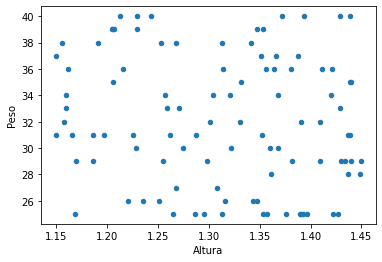

In [ ]:
# Gráfique en 2D las observaciones

data.plot.scatter(x='Altura', y='Peso')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.show()

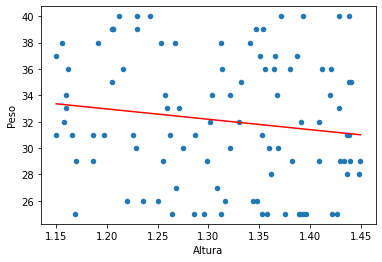

In [ ]:
# Gráfique en 2D todas las observaciones y además la línea de mejor ajuste en el mismo gráfico

x = [1.15, 1.45]
y = [algoritmo(a, b, x[0]),algoritmo(a, b, x[1])]
data.plot.scatter(x='Altura', y='Peso')
plt.plot(x, y, 'r')
plt.xlabel('Altura')
plt.ylabel('Peso')
plt.show()


In [ ]:
# Predicciones de 20 valores distintos donde 6 valores sean iguales al set de datos del punto 1
                     
altura2 = []
altura2 = random.sample(altura, 6)
while(len(altura2) < 20):
  num = random.uniform(1.15, 1.45)
  if(num not in altura2):
    altura2.append(num)

peso2 = []
for i in altura2:
    peso2.append(algoritmo(a, b, i))

data2 = pd.DataFrame({'Altura':altura2, 'Peso':peso2})

def highlight_rows(data2):
    if data2.Altura in altura:
        return['background-color: red']*2

data2.style.apply(highlight_rows, axis = 1)

,Altura,Peso
0,1.353334,31.763666
1,1.353692,31.760855
2,1.439837,31.085269
3,1.448270,31.019138
4,1.393606,31.447832
5,1.169066,33.208765
6,1.229790,32.732544
7,1.325430,31.982495
8,1.439821,31.085397
9,1.419454,31.245124
